## Data Load

![Jupyter Logo](Logos/cyborg.png)


In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset ID and download path
dataset = "stephanmatzka/predictive-maintenance-dataset-ai4i-2020"
download_path = "datasets/predictive_maintenance"  # Specify your desired download directory

# Download the dataset and unzip it
api.dataset_download_files(dataset, path=download_path, unzip=True)
print(f"Dataset downloaded and unzipped at: {download_path}")

Dataset URL: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
Dataset downloaded and unzipped at: datasets/predictive_maintenance


# Train, Validation and Test Split 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import os
print(os.getcwd())
file_path = "Data.csv"
milling = pd.read_csv(file_path)
milling.head()

/Users/leonardochavezrojas/Desktop/Master/I/DT/DT2- Machine Learning /Assignment /ML Code


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
milling ['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [4]:
type_proportions = milling['Type'].value_counts(normalize=True) #  proportions of each type in the dataset (L,M,H)
print(type_proportions)

data= pd.DataFrame(milling)

train_size = 0.7
validation_size = 0.15
test_size = 0.15

Type
L    0.6000
M    0.2997
H    0.1003
Name: proportion, dtype: float64


In [5]:
train_data, temp_data = train_test_split(data, test_size=(validation_size + test_size), stratify=data['Type'], random_state= 42)
val_data, test_data = train_test_split(temp_data, test_size=test_size / (validation_size + test_size),  stratify=temp_data['Type'], random_state= 42)

train_dist = train_data['Type'].value_counts(normalize=True)
val_dist = val_data['Type'].value_counts(normalize=True)
test_dist = test_data['Type'].value_counts(normalize=True)
train_size_actual = len(train_data)
val_size_actual = len(val_data)
test_size_actual = len(test_data)

print("Train set size:", train_size_actual)
print("Validation set size:", val_size_actual)
print("Test set size:", test_size_actual)
print("\nTrain set distribution:\n", train_dist)
print("\nValidation set distribution:\n", val_dist)
print("\nTest set distribution:\n", test_dist)


Train set size: 7000
Validation set size: 1500
Test set size: 1500

Train set distribution:
 Type
L    0.600000
M    0.299714
H    0.100286
Name: proportion, dtype: float64

Validation set distribution:
 Type
L    0.6
M    0.3
H    0.1
Name: proportion, dtype: float64

Test set distribution:
 Type
L    0.600000
M    0.299333
H    0.100667
Name: proportion, dtype: float64


# Preprocessing data (Cleaning)

In [6]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,7000.0,NaN,NaN,NaN,4993.486714,2890.699301,1.0,2491.75,5009.0,7495.75,9999.0
Product ID,7000,7000,L53702,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7000,3,L,4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],7000.0,NaN,NaN,NaN,299.996143,1.993632,295.3,298.3,300.1,301.5,304.4
Process temperature [K],7000.0,NaN,NaN,NaN,309.995886,1.479892,305.7,308.8,310.0,311.0,313.8
Rotational speed [rpm],7000.0,NaN,NaN,NaN,1537.601571,178.4535,1181.0,1422.0,1503.0,1611.0,2886.0
Torque [Nm],7000.0,NaN,NaN,NaN,40.0135,9.964286,3.8,33.2,40.1,46.8,76.6
Tool wear [min],7000.0,NaN,NaN,NaN,107.577143,63.630854,0.0,53.0,107.0,162.0,253.0
Machine failure,7000.0,NaN,NaN,NaN,0.034571,0.182705,0.0,0.0,0.0,0.0,1.0
TWF,7000.0,NaN,NaN,NaN,0.004857,0.069529,0.0,0.0,0.0,0.0,1.0


In [7]:
train_data['Machine failure'].value_counts()

Machine failure
0    6758
1     242
Name: count, dtype: int64


Counts for Machine failure:
Machine failure
0    6758
1     242
Name: count, dtype: int64

Counts for TWF:
TWF
0    6966
1      34
Name: count, dtype: int64

Counts for HDF:
HDF
0    6919
1      81
Name: count, dtype: int64

Counts for PWF:
PWF
0    6933
1      67
Name: count, dtype: int64

Counts for OSF:
OSF
0    6931
1      69
Name: count, dtype: int64

Counts for RNF:
RNF
0    6987
1      13
Name: count, dtype: int64


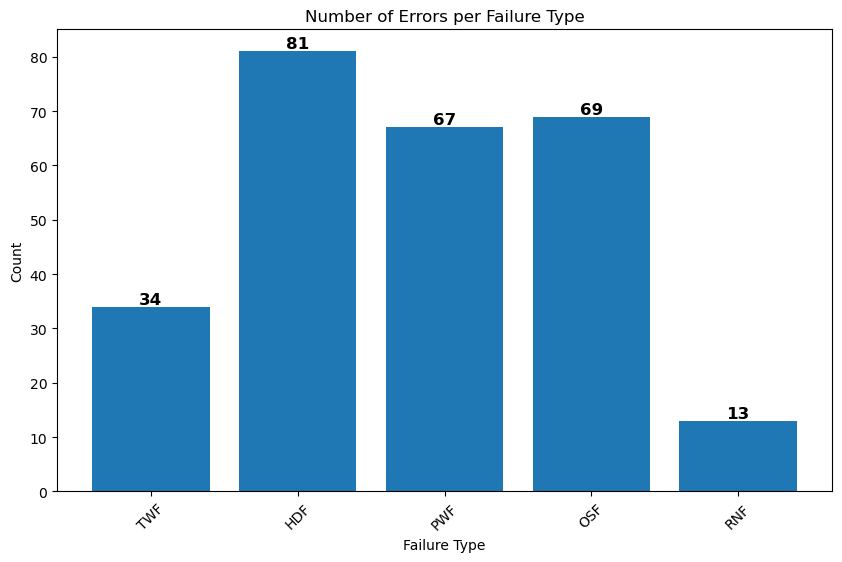

In [8]:
 columns_to_analyze = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
counts_summary = {col: train_data[col].value_counts() for col in columns_to_analyze}
for column, counts in counts_summary.items():
    print(f"\nCounts for {column}:\n{counts}")

failure_counts = {col: train_data[col].sum() for col in columns_to_analyze[1:]}
plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.keys(), failure_counts.values())

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Number of Errors per Failure Type")
plt.xticks(rotation=45)
plt.show()

In [9]:
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

machine_failure_rows = train_data[train_data['Machine failure'] == 1]
machine_failure_rows.loc[:, 'Count of Other Failures'] = machine_failure_rows[failure_modes[1:]].sum(axis=1)
count_multiple_failures = (machine_failure_rows['Count of Other Failures'] > 1).sum()
count_single_failure = (machine_failure_rows['Count of Other Failures'] == 1).sum()

print(f"Times when 'Machine failure' is present and multiple failures appear: {count_multiple_failures}")
print(f"Times when 'Machine failure' is present and only one failure appears: {count_single_failure}")


Times when 'Machine failure' is present and multiple failures appear: 14
Times when 'Machine failure' is present and only one failure appears: 223


/var/folders/tg/l_hs5wds7gzdb2g4lgw6f1vc0000gn/T/ipykernel_2793/627952367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_failure_rows.loc[:, 'Count of Other Failures'] = machine_failure_rows[failure_modes[1:]].sum(axis=1)


In [10]:
print(train_data.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [11]:
numeric = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]' ] 
train_data[numeric].dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object

Correlation Matrix:
                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.875521   
Process temperature [K]             0.875521                 1.000000   
Rotational speed [rpm]              0.025613                 0.018871   
Torque [Nm]                        -0.014500                -0.012812   
Tool wear [min]                     0.019373                 0.017262   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.025613    -0.014500         0.019373  
Process temperature [K]                0.018871    -0.012812         0.017262  
Rotational speed [rpm]                 1.000000    -0.876721        -0.000990  
Torque [Nm]                           -0.876721     1.000000        -0.001372  
Tool wear [min]                       -0.000990    -0.001372         1.000000  


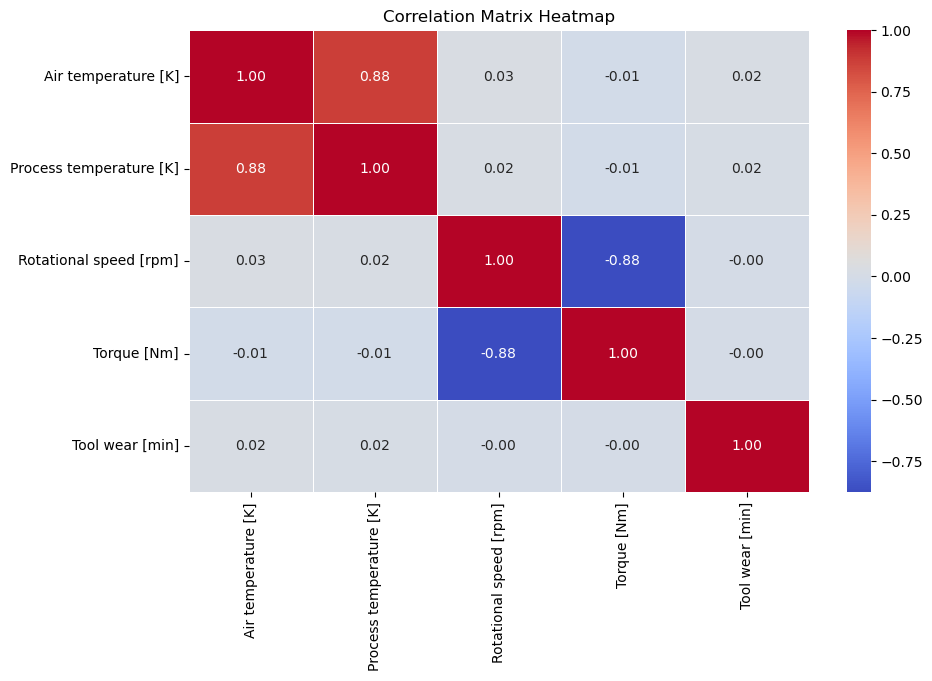

In [12]:
numeric_data = train_data[numeric]
corr_matrix = numeric_data.corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Outliers 

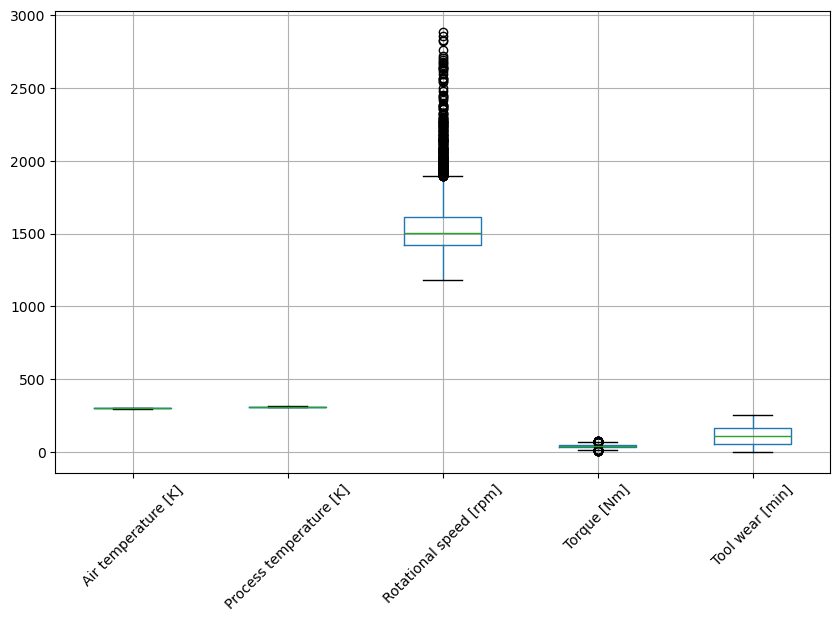

In [13]:
plt.figure(figsize=(10, 6))
train_data[numeric].boxplot()
plt.xticks(rotation=45)
plt.show()

In [14]:
for column in numeric:
    Q1 = train_data[column].quantile(0.25)  
    Q3 = train_data[column].quantile(0.75)  
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]

    print(f"{column}:")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Lower bound: {lower_bound}, Upper bound: {upper_bound}\n")

Air temperature [K]:
  Number of outliers: 0
  Lower bound: 293.5, Upper bound: 306.29999999999995

Process temperature [K]:
  Number of outliers: 0
  Lower bound: 305.5, Upper bound: 314.29999999999995

Rotational speed [rpm]:
  Number of outliers: 285
  Lower bound: 1138.5, Upper bound: 1894.5

Torque [Nm]:
  Number of outliers: 46
  Lower bound: 12.800000000000011, Upper bound: 67.19999999999999

Tool wear [min]:
  Number of outliers: 0
  Lower bound: -110.5, Upper bound: 325.5



# Feature Engineer 

## Remove Columns 

In [15]:
remove = ['UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
train_data2 = train_data.drop(columns=remove)
train_data2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
6522,L,301.1,310.1,1489,45.8,42,0
474,L,297.4,309.1,1478,49.8,150,0
7365,L,299.6,310.1,2057,20.4,60,0
8167,H,299.7,311.1,1353,47.1,143,0
7713,M,300.5,311.4,2072,18.8,75,0


## Encoding Data (Ordinal Encoding ) 

In [16]:
train_data_Encode=train_data2.copy()
train_data_Encode['Type'] = train_data_Encode['Type'].map({'L': 1, 'M': 2, 'H': 3})
train_data_Encode.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
6522,1,301.1,310.1,1489,45.8,42,0
474,1,297.4,309.1,1478,49.8,150,0
7365,1,299.6,310.1,2057,20.4,60,0
8167,3,299.7,311.1,1353,47.1,143,0
7713,2,300.5,311.4,2072,18.8,75,0


## New Features 

In [17]:
import math

#For Machine learning model 
train_data_NF=train_data_Encode.copy()
train_data_NF['Temperature difference [k]']= train_data_NF['Process temperature [K]'] - train_data_NF['Air temperature [K]']
train_data_NF['Power [W]'] = train_data_NF['Torque [Nm]'] * train_data_NF['Rotational speed [rpm]'] * (2 * math.pi / 60)
train_data_NF['Strain [minNm]'] = train_data_NF['Torque [Nm]'] * train_data_NF['Tool wear [min]']

#For plots
remove = ['UDI', 'Product ID','Type']
train_data3 = train_data.drop(columns=remove)
train_data3.head()
train_data_NFplot= train_data3.copy()
train_data_NFplot['Temperature difference [k]']= train_data_NF['Process temperature [K]'] - train_data_NF['Air temperature [K]']
train_data_NFplot['Power [W]'] = train_data_NF['Torque [Nm]'] * train_data_NF['Rotational speed [rpm]'] * (2 * math.pi / 60)
train_data_NFplot['Strain [minNm]'] = train_data_NF['Torque [Nm]'] * train_data_NF['Tool wear [min]']

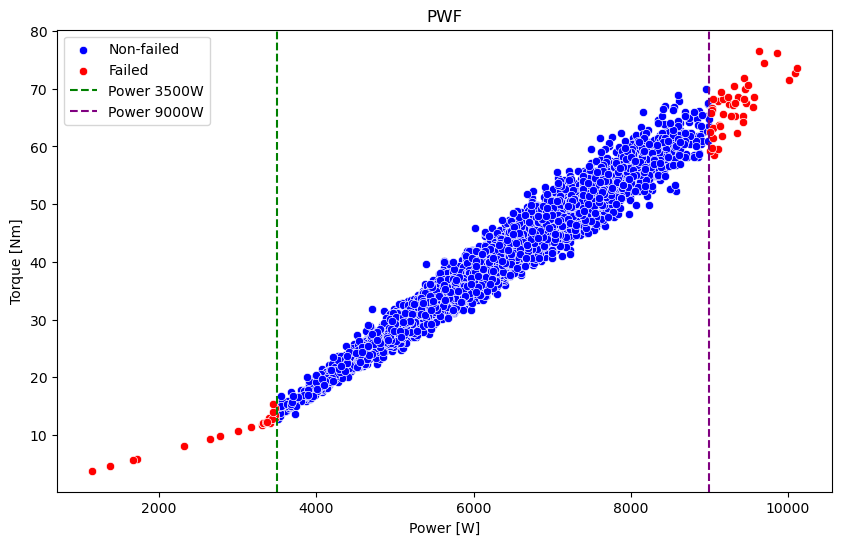

Type Below 3500W: 24 failures
Type Above 9000W: 43 failures


In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['PWF'] == 0], x='Power [W]', y='Torque [Nm]', color='blue', label='Non-failed') 
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['PWF'] == 1], x='Power [W]', y='Torque [Nm]', color='red', label='Failed')
plt.axvline(3500, color='green', linestyle='--', label='Power 3500W')
plt.axvline(9000, color='purple', linestyle='--', label='Power 9000W')

thresholds = {'Below 3500W': 3500, 'Above 9000W': 9000}
failed_data = train_data_NFplot[train_data_NFplot['PWF'] == 1]
failed_counts = {
    'Below 3500W': failed_data[failed_data['Power [W]'] < thresholds['Below 3500W']].shape[0],
    'Above 9000W': failed_data[failed_data['Power [W]'] > thresholds['Above 9000W']].shape[0]
}


plt.xlabel('Power [W]')
plt.ylabel('Torque [Nm]')
plt.title('PWF')
plt.legend()
plt.show()

for type_, count in failed_counts.items():
    print(f"Type {type_}: {count} failures")

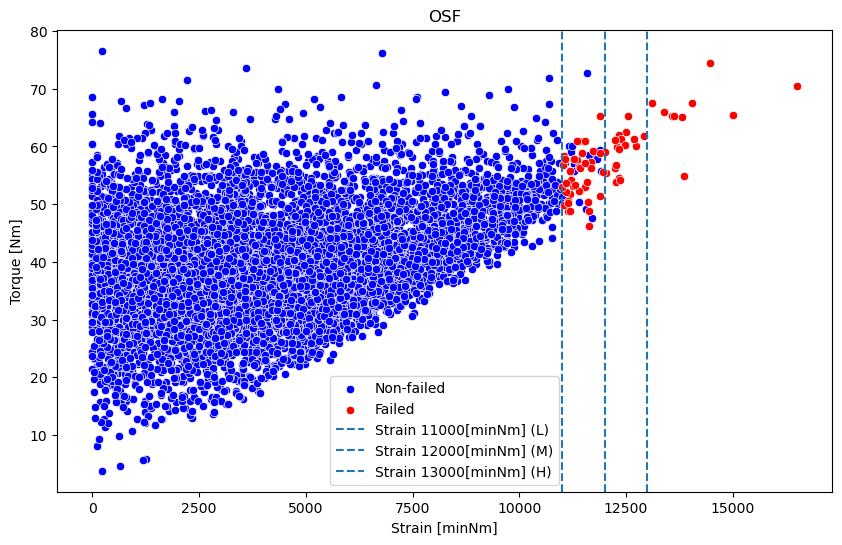

Type L: 69 failures
Type M: 28 failures
Type H: 10 failures


In [19]:
thresholds = {'L': 11000, 'M': 12000, 'H': 13000}

failed_data = train_data_NFplot[train_data_NFplot['OSF'] == 1]
failed_counts = {
    type_: failed_data[(failed_data['Tool wear [min]'] * failed_data['Torque [Nm]']) >= threshold].shape[0]
    for type_, threshold in thresholds.items()
}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['OSF'] == 0], 
                x='Strain [minNm]', y='Torque [Nm]', color='blue', label='Non-failed')
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['OSF'] == 1], 
                x='Strain [minNm]', y='Torque [Nm]', color='red', label='Failed')


for type_, threshold in thresholds.items():
    plt.axvline(threshold, linestyle='--', label=f'Strain {threshold}[minNm] ({type_})')


plt.xlabel('Strain [minNm]')
plt.ylabel('Torque [Nm]')
plt.title('OSF')
plt.legend()
plt.show()

for type_, count in failed_counts.items():
    print(f"Type {type_}: {count} failures")

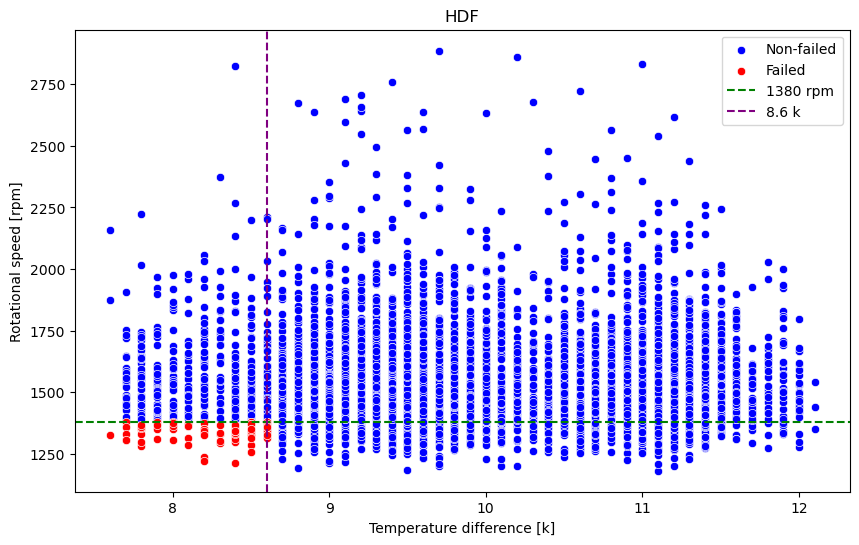

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['HDF'] == 0], x='Temperature difference [k]', y='Rotational speed [rpm]', color='blue', label='Non-failed')
sns.scatterplot(data=train_data_NFplot[train_data_NFplot['HDF'] == 1], x='Temperature difference [k]', y='Rotational speed [rpm]', color='red', label='Failed')
plt.axhline(1380, color='green', linestyle='--', label='1380 rpm')
plt.axvline(8.6, color='purple', linestyle='--', label='8.6 k')
plt.xlabel('Temperature difference [k]')
plt.ylabel('Rotational speed [rpm]')
plt.title('HDF')
plt.legend()
plt.show()

# Random Forest & SVM

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = train_data_NF
y_train = train_data['Machine failure']  
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')  
train_recall = recall_score(y_train, y_train_pred, average='weighted')       
train_f1 = f1_score(y_train, y_train_pred, average='weighted')               


print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

Training Set Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data_NF)  
y_train = train_data['Machine failure']  

svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train_scaled, y_train)
y_train_pred = svm_model.predict(X_train_scaled)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')


print("Training Set Metrics (SVM):")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")



Training Set Metrics (SVM):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


## Grid Search 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


param_grid = {
    'max_depth': [2, 3, 5], 
    'min_samples_split': [10, 50, 100],  
    'min_samples_leaf': [10, 20, 50],  
    'max_features': [0.5, 'sqrt'], 
    'n_estimators': [10, 50],  
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1,  
    verbose=0  
)

grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_rf_model = grid_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')


print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

Best Hyperparameters: {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}
Best Cross-Validation Accuracy: 1.0

Training Set Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler



svm_model = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]  # Only relevant for the 'poly' kernel
}


grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=3,  #
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=0  
)

grid_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_  


y_train_pred = best_svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")


Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 1.0

Training Set Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


## Pipeline RF

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
import math

# Function to remove columns
def remove_columns(data):
    columns_to_remove = ['UDI', 'Product ID','TWF', 'HDF', 'PWF', 'OSF', 'RNF'] 
    return data.drop(columns=columns_to_remove)

# Function to create new features
def create_features(data):
    data = data.copy()  
    data['Temperature difference [k]'] = data['Process temperature [K]'] - data['Air temperature [K]']
    data['Power [W]'] = data['Torque [Nm]'] * data['Rotational speed [rpm]'] * (2 * math.pi / 60)
    data['Strain [minNm]'] = data['Torque [Nm]'] * data['Tool wear [min]']
    return data

pipeline_RF = Pipeline([
    ('remove_columns', FunctionTransformer(remove_columns)),  # Step 1: Remove unwanted columns
    ('encode', FunctionTransformer(lambda df: df.assign(Type=df['Type'].map({'L': 1, 'M': 2, 'H': 3})))),  # Step 2: Encode 'Type'
    ('create_features', FunctionTransformer(create_features)),  # Step 3: Add new features
    ('rf', RandomForestClassifier(  # Step 4: Random Forest classifier
        max_depth=2,
        max_features=0.5,
        min_samples_leaf=10,
        min_samples_split=10,
        n_estimators=10,
        random_state=42
    ))
])

X_train = train_data.drop(columns=['Machine failure']) 
y_train = train_data['Machine failure']

pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('remove_columns',
                 FunctionTransformer(func=<function remove_columns at 0x305268180>)),
                ('encode',
                 FunctionTransformer(func=<function <lambda> at 0x30522fc40>)),
                ('create_features',
                 FunctionTransformer(func=<function create_features at 0x30522e5c0>)),
                ('rf',
                 RandomForestClassifier(max_depth=2, max_features=0.5,
                                        min_samples_leaf=10,
                                        min_samples_split=10, n_estimators=10,
                                        random_state=42))])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.svm import SVC
import math

def remove_columns(data):
    columns_to_remove = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    return data.drop(columns=columns_to_remove)

def create_features(data):
    data = data.copy()
    data['Temperature difference [k]'] = data['Process temperature [K]'] - data['Air temperature [K]']
    data['Power [W]'] = data['Torque [Nm]'] * data['Rotational speed [rpm]'] * (2 * math.pi / 60)
    data['Strain [minNm]'] = data['Torque [Nm]'] * data['Tool wear [min]']
    return data

pipeline_with_svm = Pipeline([
    ('remove_columns', FunctionTransformer(remove_columns)),  # Step 1: Remove unwanted columns
    ('encode', FunctionTransformer(lambda df: df.assign(Type=df['Type'].map({'L': 1, 'M': 2, 'H': 3})))),  # Step 2: Encode 'Type'
    ('create_features', FunctionTransformer(create_features)),  # Step 3: Add new features
    ('scaler', StandardScaler()),  # Step 4: Scale the data (required for SVM)
    ('svm', SVC(  # Step 5: SVM classifier
        C=0.1,
        degree=2,
        gamma='scale',
        kernel='linear',
        random_state=42
    ))
])

X_train = train_data.drop(columns=['Machine failure'])
y_train = train_data['Machine failure']
pipeline_with_svm.fit(X_train, y_train)



Pipeline(steps=[('remove_columns',
                 FunctionTransformer(func=<function remove_columns at 0x30522e2a0>)),
                ('encode',
                 FunctionTransformer(func=<function <lambda> at 0x30522fd80>)),
                ('create_features',
                 FunctionTransformer(func=<function create_features at 0x30522e340>)),
                ('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.1, degree=2, kernel='linear', random_state=42))])

# Evaluation 

## Train Set 

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train2 = train_data.drop(columns=['Machine failure'])
y_train2 = train_data['Machine failure']

# Predictions with Random Forest Pipeline
y_train_pred_rf = pipeline_RF.predict(X_train2)

# Predictions with SVM Pipeline
y_train_pred_svm = pipeline_with_svm.predict(X_train2)

# Evaluate Random Forest Pipeline
train_accuracy_rf = accuracy_score(y_train2, y_train_pred_rf)
train_precision_rf = precision_score(y_train2, y_train_pred_rf, average='weighted')
train_recall_rf = recall_score(y_train2, y_train_pred_rf, average='weighted')
train_f1_rf = f1_score(y_train2, y_train_pred_rf, average='weighted')

# Evaluate SVM Pipeline
train_accuracy_svm = accuracy_score(y_train2, y_train_pred_svm)
train_precision_svm = precision_score(y_train2, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_train2, y_train_pred_svm, average='weighted')
train_f1_svm = f1_score(y_train2, y_train_pred_svm, average='weighted')

# Print Results
print("Train Set Metrics (Random Forest):")
print(f"Accuracy: {train_accuracy_rf:.2f}")
print(f"Precision: {train_precision_rf:.2f}")
print(f"Recall: {train_recall_rf:.2f}")
print(f"F1 Score: {train_f1_rf:.2f}")

print("\nTrain Set Metrics (SVM):")
print(f"Accuracy: {train_accuracy_svm:.2f}")
print(f"Precision: {train_precision_svm:.2f}")
print(f"Recall: {train_recall_svm:.2f}")
print(f"F1 Score: {train_f1_svm:.2f}")


Train Set Metrics (Random Forest):
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.97

Train Set Metrics (SVM):
Accuracy: 0.97
Precision: 0.93
Recall: 0.97
F1 Score: 0.95


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Validation Set

In [28]:
X_val2 = val_data.drop(columns=['Machine failure'])
y_val2 = val_data['Machine failure']

# Predictions with Random Forest Pipeline
y_val_pred_rf = pipeline_RF.predict(X_val2)

# Predictions with SVM Pipeline
y_val_pred_svm = pipeline_with_svm.predict(X_val2)

# Evaluate Random Forest Pipeline
val_accuracy_rf = accuracy_score(y_val2, y_val_pred_rf)
val_precision_rf = precision_score(y_val2, y_val_pred_rf, average='weighted')
val_recall_rf = recall_score(y_val2, y_val_pred_rf, average='weighted')
val_f1_rf = f1_score(y_val2, y_val_pred_rf, average='weighted')

# Evaluate SVM Pipeline
val_accuracy_svm = accuracy_score(y_val2, y_val_pred_svm)
val_precision_svm = precision_score(y_val2, y_val_pred_svm, average='weighted')
val_recall_svm = recall_score(y_val2, y_val_pred_svm, average='weighted')
val_f1_svm = f1_score(y_val2, y_val_pred_svm, average='weighted')

# Print Results
print("Validation Set Metrics (Random Forest):")
print(f"Accuracy: {val_accuracy_rf:.2f}")
print(f"Precision: {val_precision_rf:.2f}")
print(f"Recall: {val_recall_rf:.2f}")
print(f"F1 Score: {val_f1_rf:.2f}")

print("\nValidation Set Metrics (SVM):")
print(f"Accuracy: {val_accuracy_svm:.2f}")
print(f"Precision: {val_precision_svm:.2f}")
print(f"Recall: {val_recall_svm:.2f}")
print(f"F1 Score: {val_f1_svm:.2f}")


Validation Set Metrics (Random Forest):
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.97

Validation Set Metrics (SVM):
Accuracy: 0.97
Precision: 0.93
Recall: 0.97
F1 Score: 0.95


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Test Set

In [29]:
import time
X_test2 = test_data.drop(columns=['Machine failure'])
y_test2 = test_data['Machine failure']

# Time and Predictions with Random Forest Pipeline
start_time_rf = time.time()
y_test_pred_rf = pipeline_RF.predict(X_test2)
end_time_rf = time.time()
rf_prediction_time = end_time_rf - start_time_rf

# Time and Predictions with SVM Pipeline
start_time_svm = time.time()
y_test_pred_svm = pipeline_with_svm.predict(X_test2)
end_time_svm = time.time()
svm_prediction_time = end_time_svm - start_time_svm

# Evaluate Random Forest Pipeline
test_accuracy_rf = accuracy_score(y_test2, y_test_pred_rf)
test_precision_rf = precision_score(y_test2, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test2, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test2, y_test_pred_rf, average='weighted')

# Evaluate SVM Pipeline
test_accuracy_svm = accuracy_score(y_test2, y_test_pred_svm)
test_precision_svm = precision_score(y_test2, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_test2, y_test_pred_svm, average='weighted')
test_f1_svm = f1_score(y_test2, y_test_pred_svm, average='weighted')

# Print Results
print("\nTest Set Metrics (Random Forest):")
print(f"Accuracy: {test_accuracy_rf:.2f}")
print(f"Precision: {test_precision_rf:.2f}")
print(f"Recall: {test_recall_rf:.2f}")
print(f"F1 Score: {test_f1_rf:.2f}")
print(f"Prediction Time: {rf_prediction_time:.4f} seconds")

print("\nTest Set Metrics (SVM):")
print(f"Accuracy: {test_accuracy_svm:.2f}")
print(f"Precision: {test_precision_svm:.2f}")
print(f"Recall: {test_recall_svm:.2f}")
print(f"F1 Score: {test_f1_svm:.2f}")
print(f"Prediction Time: {svm_prediction_time:.4f} seconds")


metrics_data = {
    "Model": ["Random Forest", "SVM", "Random Forest", "SVM", "Random Forest", "SVM"],
    "Dataset": ["Train", "Train", "Validation", "Validation", "Test", "Test"],
    "Accuracy": [train_accuracy_rf, train_accuracy_svm, val_accuracy_rf, val_accuracy_svm, test_accuracy_rf, test_accuracy_svm],
    "Precision": [train_precision_rf, train_precision_svm, val_precision_rf, val_precision_svm, test_precision_rf, test_precision_svm],
    "Recall": [train_recall_rf, train_recall_svm, val_recall_rf, val_recall_svm, test_recall_rf, test_recall_svm],
    "F1 Score": [train_f1_rf, train_f1_svm, val_f1_rf, val_f1_svm, test_f1_rf, test_f1_svm],
    "Prediction Time (s)": [None, None, None, None, rf_prediction_time, svm_prediction_time]  # Only test prediction times included
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)



Test Set Metrics (Random Forest):
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Prediction Time: 0.0053 seconds

Test Set Metrics (SVM):
Accuracy: 0.97
Precision: 0.94
Recall: 0.97
F1 Score: 0.95
Prediction Time: 0.0134 seconds
           Model     Dataset  Accuracy  Precision    Recall  F1 Score  \
0  Random Forest       Train  0.978143   0.977736  0.978143  0.973584   
1            SVM       Train  0.965429   0.932052  0.965429  0.948447   
2  Random Forest  Validation  0.976667   0.975949  0.976667  0.971218   
3            SVM  Validation  0.966000   0.933156  0.966000  0.949294   
4  Random Forest        Test  0.980667   0.978664  0.980667  0.977877   
5            SVM        Test  0.969333   0.939607  0.969333  0.954239   

   Prediction Time (s)  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4             0.005290  
5             0.013442  


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix 

In [30]:
conf_matrix_train_rf = confusion_matrix(y_train2, y_train_pred_rf)
print("Confusion Matrix: Train (Random Forest)")
print(conf_matrix_train_rf)

conf_matrix_train_svm = confusion_matrix(y_train2, y_train_pred_svm)
print("\nConfusion Matrix: Train (SVM)")
print(conf_matrix_train_svm)

conf_matrix_val_rf = confusion_matrix(y_val2, y_val_pred_rf)
print("\nConfusion Matrix: Validation (Random Forest)")
print(conf_matrix_val_rf)

conf_matrix_val_svm = confusion_matrix(y_val2, y_val_pred_svm)
print("\nConfusion Matrix: Validation (SVM)")
print(conf_matrix_val_svm)

conf_matrix_test_rf = confusion_matrix(y_test2, y_test_pred_rf)
print("\nConfusion Matrix: Test (Random Forest)")
print(conf_matrix_test_rf)

conf_matrix_test_svm = confusion_matrix(y_test2, y_test_pred_svm)
print("\nConfusion Matrix: Test (SVM)")
print(conf_matrix_test_svm)

Confusion Matrix: Train (Random Forest)
[[6754    4]
 [ 149   93]]

Confusion Matrix: Train (SVM)
[[6758    0]
 [ 242    0]]

Confusion Matrix: Validation (Random Forest)
[[1448    1]
 [  34   17]]

Confusion Matrix: Validation (SVM)
[[1449    0]
 [  51    0]]

Confusion Matrix: Test (Random Forest)
[[1450    4]
 [  25   21]]

Confusion Matrix: Test (SVM)
[[1454    0]
 [  46    0]]


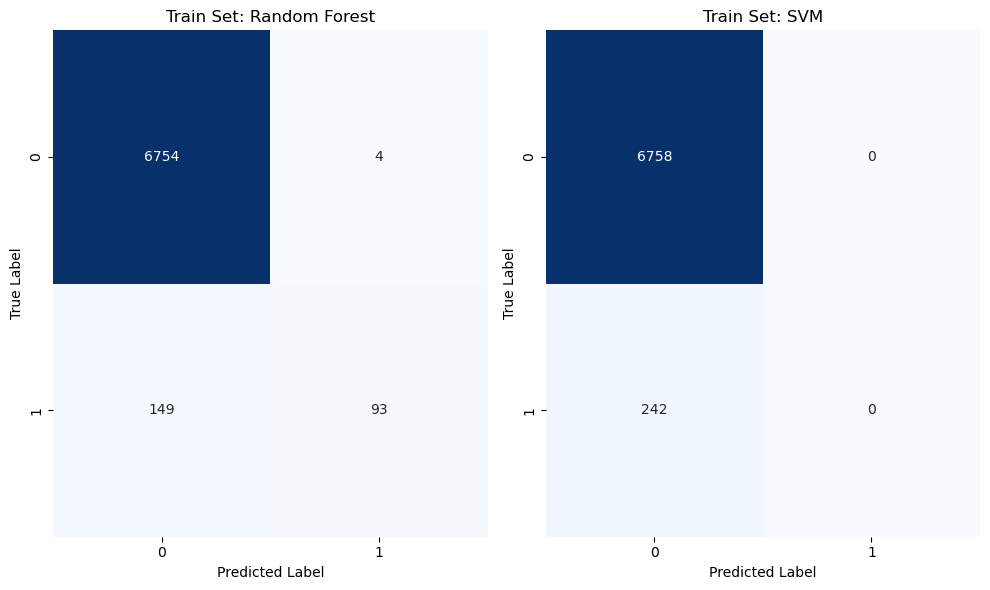

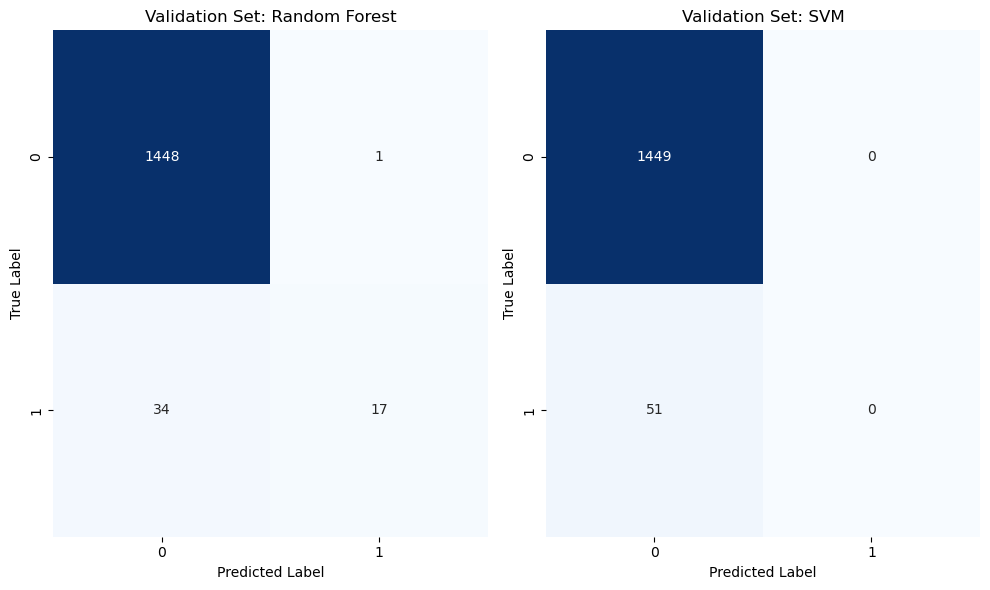

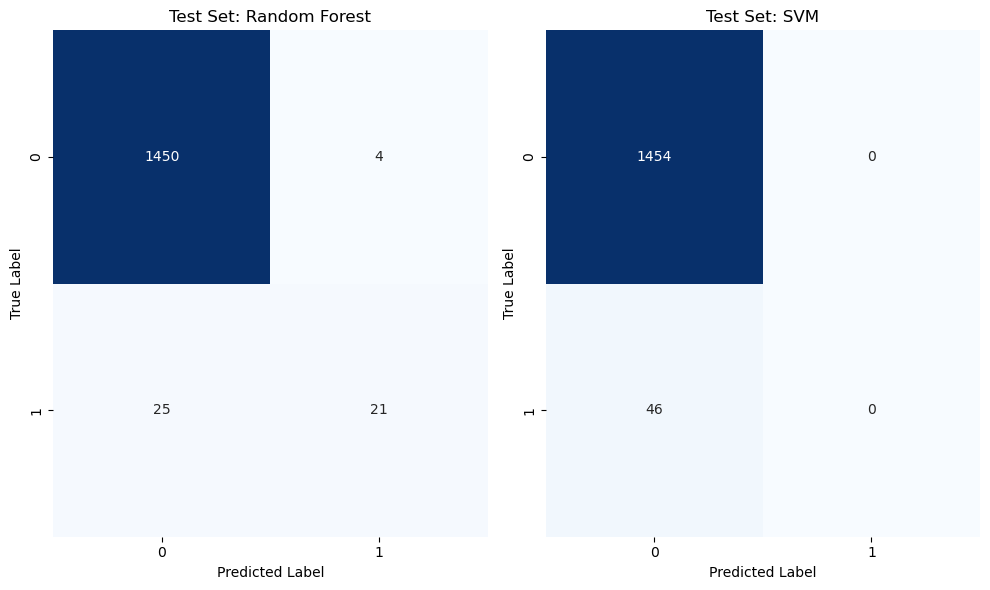

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrices side by side
def plot_conf_matrices_side_by_side(conf_matrices, titles, figsize=(10, 6)):
    cols = len(conf_matrices)
    plt.figure(figsize=figsize)
    for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles), start=1):
        plt.subplot(1, cols, i)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(title)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Confusion Matrices
conf_matrix_train_rf = confusion_matrix(y_train2, y_train_pred_rf)
conf_matrix_train_svm = confusion_matrix(y_train2, y_train_pred_svm)
conf_matrix_val_rf = confusion_matrix(y_val2, y_val_pred_rf)
conf_matrix_val_svm = confusion_matrix(y_val2, y_val_pred_svm)
conf_matrix_test_rf = confusion_matrix(y_test2, y_test_pred_rf)
conf_matrix_test_svm = confusion_matrix(y_test2, y_test_pred_svm)

# Titles for the confusion matrices
titles_train = ["Train Set: Random Forest", "Train Set: SVM"]
titles_val = ["Validation Set: Random Forest", "Validation Set: SVM"]
titles_test = ["Test Set: Random Forest", "Test Set: SVM"]

# Plot Confusion Matrices Side by Side
plot_conf_matrices_side_by_side([conf_matrix_train_rf, conf_matrix_train_svm], titles_train)
plot_conf_matrices_side_by_side([conf_matrix_val_rf, conf_matrix_val_svm], titles_val)
plot_conf_matrices_side_by_side([conf_matrix_test_rf, conf_matrix_test_svm], titles_test)


## Learning Curve 

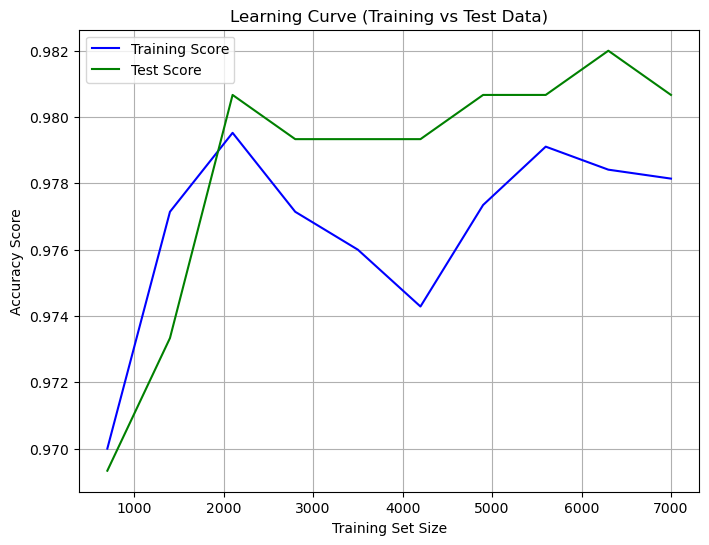

In [32]:
import numpy as np
import matplotlib.pyplot as plt
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []


for train_size in train_sizes:

    train_subset_size = int(train_size * len(X_train2))
    X_train_subset = X_train2[:train_subset_size]
    y_train_subset = y_train2[:train_subset_size]
    pipeline_RF.fit(X_train_subset, y_train_subset)
    
    # Evaluate on the training subset
    train_score = pipeline_RF.score(X_train_subset, y_train_subset)
    train_scores.append(train_score)
    
    # Evaluate on the full test set
    test_score = pipeline_RF.score(X_test2, y_test2)
    test_scores.append(test_score)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes * len(X_train2), train_scores, label='Training Score', color='blue')
plt.plot(train_sizes * len(X_train2), test_scores, label='Test Score', color='green')


plt.title('Learning Curve (Training vs Test Data)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()


## ROC AUC

ROC-AUC Score: 0.86924


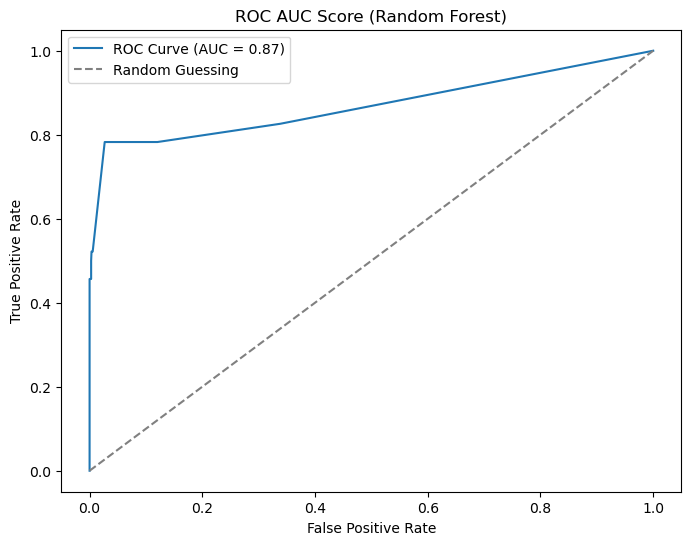

In [33]:
from sklearn.metrics import roc_auc_score
y_test_prob2 = pipeline_RF.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(y_test2, y_test_prob2)
print(f"ROC-AUC Score: {auc_score:.5f}")

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test2, y_test_prob2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Score (Random Forest)')
plt.legend()
plt.show()

In [34]:
rf_model = pipeline_RF.named_steps['rf']
feature_importances = rf_model.feature_importances_
processed_features = pipeline_RF[:-1].transform(X_train).columns

import pandas as pd
importance_df = pd.DataFrame({
    'Feature': processed_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

                      Feature  Importance
8              Strain [minNm]    0.456162
7                   Power [W]    0.215473
4                 Torque [Nm]    0.165017
3      Rotational speed [rpm]    0.135998
0                        Type    0.015008
2     Process temperature [K]    0.006482
1         Air temperature [K]    0.003853
6  Temperature difference [k]    0.002007
5             Tool wear [min]    0.000000


# Neural Network 

In [35]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [36]:
import os
print(os.getcwd())  # This shows your current working directory

/Users/leonardochavezrojas/Desktop/Master/I/DT/DT2- Machine Learning /Assignment /ML Code


In [37]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from scikeras.wrappers import KerasClassifier


SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Function to remove columns
def remove_columns(data):
    columns_to_remove = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    return data.drop(columns=columns_to_remove, errors='ignore')

# Function to create new features
def create_features(data):
    data = data.copy()
    data['Temperature difference [K]'] = data['Process temperature [K]'] - data['Air temperature [K]']
    data['Power [W]'] = data['Torque [Nm]'] * data['Rotational speed [rpm]'] * (2 * math.pi / 60)
    data['Strain [minNm]'] = data['Torque [Nm]'] * data['Tool wear [min]']
    return data

# Define Neural Network Model
def create_nn_model(input_dim):
    if input_dim is None:
        raise ValueError("input_dim must be provided")

    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


X_train = train_data.drop(columns=['Machine failure'])
y_train = train_data['Machine failure']


pipeline_with_nn = Pipeline([
    ('remove_columns', FunctionTransformer(remove_columns)),  
    ('encode', FunctionTransformer(lambda df: df.assign(Type=df['Type'].map({'L': 1, 'M': 2, 'H': 3})))),  
    ('create_features', FunctionTransformer(create_features)),  
    ('scaler', StandardScaler()),  
    ('nn', KerasClassifier(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=0, random_state=SEED))  
])


X_train_transformed = pipeline_with_nn[:-1].fit_transform(X_train)
pipeline_with_nn[-1].set_params(model__input_dim=X_train_transformed.shape[1])
pipeline_with_nn.fit(X_train, y_train)


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-13 11:53:54.026253: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(

Pipeline(steps=[('remove_columns',
                 FunctionTransformer(func=<function remove_columns at 0x30754b4c0>)),
                ('encode',
                 FunctionTransformer(func=<function <lambda> at 0x30754af20>)),
                ('create_features',
                 FunctionTransformer(func=<function create_features at 0x30754bc40>)),
                ('scaler', StandardScaler()),
                ('nn',
                 KerasClassifier(batch_size=32, build_fn=<function create_nn_model at 0x30754b920>, epochs=50, model__input_dim=9, random_state=42, verbose=0))])

In [38]:
X_train3 = train_data.drop(columns=['Machine failure'])
y_train3 = train_data['Machine failure']
y_train_pred3 = pipeline_with_nn.predict(X_train3)

train_accuracy3 = accuracy_score(y_train3, y_train_pred3)
train_precision3 = precision_score(y_train3, y_train_pred3, average='weighted')
train_recall3 = recall_score(y_train3, y_train_pred3, average='weighted')
train_f13 = f1_score(y_train3, y_train_pred3, average='weighted')

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy3:.2f}")
print(f"Precision: {train_precision3:.2f}")
print(f"Recall: {train_recall3:.2f}")
print(f"F1 Score: {train_f13:.2f}")


Training Set Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


## Grid Search 

In [39]:
import numpy as np
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Function to preprocess data
def preprocess_data(data):
    data = data.copy()
    # Remove unnecessary columns
    data.drop(columns=['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], errors='ignore', inplace=True)
    # Encode categorical variables ('Type' column)
    if 'Type' in data.columns:
        data['Type'] = data['Type'].map({'L': 1, 'M': 2, 'H': 3})
    # Create new features
    data['Temp_diff'] = data['Process temperature [K]'] - data['Air temperature [K]']
    data['Power'] = data['Torque [Nm]'] * data['Rotational speed [rpm]'] * (2 * math.pi / 60)
    data['Strain'] = data['Torque [Nm]'] * data['Tool wear [min]']
    return data

# Define Neural Network Model
def create_nn_model(input_dim, num_layers, neurons, activation, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))
    
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess data
X = preprocess_data(train_data.drop(columns=['Machine failure']))
y = train_data['Machine failure']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Simplified Hyperparameter Choices**
num_layers_list = [2, 3]
neurons_list = [32, 64]
activation_list = ['relu']
dropout_rate_list = [0.2, 0.3]
learning_rate_list = [0.0005, 0.001]
epochs_list = [20, 30]
batch_size_list = [32, 64]

best_accuracy = 0
best_params = {}

for num_layers in num_layers_list:
    for neurons in neurons_list:
        for activation in activation_list:
            for dropout_rate in dropout_rate_list:
                for learning_rate in learning_rate_list:
                    for epochs in epochs_list:
                        for batch_size in batch_size_list:
                            
                            # Train model (silent training for speed)
                            model = create_nn_model(X_train.shape[1], num_layers, neurons, activation, dropout_rate, learning_rate)
                            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)

                            # Get best validation accuracy
                            val_accuracy = max(history.history['val_accuracy'])

                            # Store best model
                            if val_accuracy > best_accuracy:
                                best_accuracy = val_accuracy
                                best_params = {
                                    'num_layers': num_layers,
                                    'neurons': neurons,
                                    'activation': activation,
                                    'dropout_rate': dropout_rate,
                                    'learning_rate': learning_rate,
                                    'epochs': epochs,
                                    'batch_size': batch_size
                                }

# Print only the best result
print("Best Hyperparameters ")
print(best_params)
print(f"Best Validation Accuracy: {best_accuracy:.4f}")


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-13 11:54:25.757944: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown

Best Hyperparameters 
{'num_layers': 3, 'neurons': 64, 'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}
Best Validation Accuracy: 0.9879


## Tuned Neural Network 

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import math

# Seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Function to remove unnecessary columns
def remove_columns(data):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=X_train.columns)
    columns_to_remove = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    return data.drop(columns=columns_to_remove, errors='ignore')

# Function to create new features
def create_features(data):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=X_train.columns)
    data = data.copy()
    data['Temperature difference [K]'] = data['Process temperature [K]'] - data['Air temperature [K]']
    data['Power [W]'] = data['Torque [Nm]'] * data['Rotational speed [rpm]'] * (2 * math.pi / 60)
    data['Strain [minNm]'] = data['Torque [Nm]'] * data['Tool wear [min]']
    return data

# Define the neural network model
def create_tuned_nn_model(input_dim):
    if input_dim is None:
        raise ValueError("input_dim must be provided")
    
    model = Sequential()
    # Input layer
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.2))
    
    # Hidden layers (num_layers = 3 total layers including input layer)
    for _ in range(2):  # 3 total layers minus the input layer
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Example: Replace `train_data` with your actual training dataset
# train_data = pd.read_csv('your_training_data.csv')
X_train = train_data.drop(columns=['Machine failure'])
y_train = train_data['Machine failure']

# Define the pipeline with tuned parameters
tuned_pipeline_with_nn = Pipeline([
    ('remove_columns', FunctionTransformer(remove_columns)),  # Step 1: Remove unnecessary columns
    ('encode', FunctionTransformer(lambda df: df.assign(Type=df['Type'].map({'L': 1, 'M': 2, 'H': 3})))),  # Step 2: Encode 'Type'
    ('create_features', FunctionTransformer(create_features)),  # Step 3: Add new features
    ('scaler', StandardScaler()),  # Step 4: Standardize features
    ('nn', KerasClassifier(
        build_fn=create_tuned_nn_model,
        epochs=30,  # Tuned number of epochs
        batch_size=32,  # Tuned batch size
        verbose=1,
        random_state=SEED
    ))
])

# Transform the training data (excluding the NN step)
X_train_transformed = tuned_pipeline_with_nn[:-1].fit_transform(X_train)

# Dynamically set the input dimension for the NN model
tuned_pipeline_with_nn[-1].set_params(model__input_dim=X_train_transformed.shape[1])

# Train the tuned pipeline
tuned_pipeline_with_nn.fit(X_train, y_train)


Epoch 1/30


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9046 - loss: 0.3014
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9679 - loss: 0.1255
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9685 - loss: 0.1082
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9694 - loss: 0.0898
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9711 - loss: 0.0872
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9722 - loss: 0.0823
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9757 - loss: 0.0768
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9772 - loss: 0.0719
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9745 - loss: 0.0701
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9739 - loss: 0.0733
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9782 - loss: 0.0663
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 

Pipeline(steps=[('remove_columns',
                 FunctionTransformer(func=<function remove_columns at 0x376f8ce00>)),
                ('encode',
                 FunctionTransformer(func=<function <lambda> at 0x376f8fa60>)),
                ('create_features',
                 FunctionTransformer(func=<function create_features at 0x376f8e8e0>)),
                ('scaler', StandardScaler()),
                ('nn',
                 KerasClassifier(batch_size=32, build_fn=<function create_tuned_nn_model at 0x376f8f920>, epochs=30, model__input_dim=9, random_state=42))])

# Evaluating 

## Train Set 

In [45]:
X_train4 = train_data.drop(columns=['Machine failure'])
y_train4 = train_data['Machine failure']
y_train_pred4 = tuned_pipeline_with_nn.predict(X_train4)

train_accuracy4 = accuracy_score(y_train4, y_train_pred4)
train_precision4 = precision_score(y_train4, y_train_pred4, average='weighted')
train_recall4 = recall_score(y_train4, y_train_pred4, average='weighted')
train_f14 = f1_score(y_train4, y_train_pred4, average='weighted')

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy4:.2f}")
print(f"Precision: {train_precision4:.2f}")
print(f"Recall: {train_recall4:.2f}")
print(f"F1 Score: {train_f14:.2f}")


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step

Training Set Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


2025-02-13 11:57:08.256739: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-02-13 11:57:08.257078: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

## Validation Set 

In [46]:
X_val4 = val_data.drop(columns=['Machine failure'])
y_val4 = val_data['Machine failure']
y_val_pred4 = tuned_pipeline_with_nn.predict(X_val4)

val_accuracy4 = accuracy_score(y_val4, y_val_pred4)
val_precision4 = precision_score(y_val4, y_val_pred4, average='weighted')
val_recall4 = recall_score(y_val4, y_val_pred4, average='weighted')
val_f14 = f1_score(y_val4, y_val_pred4, average='weighted')

print("\nValidation Set Metrics:")
print(f"Accuracy: {val_accuracy4:.2f}")
print(f"Precision: {val_precision4:.2f}")
print(f"Recall: {val_recall4:.2f}")
print(f"F1 Score: {val_f14:.2f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step

Validation Set Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


## Test Set 

In [47]:
X_test4 = test_data.drop(columns=['Machine failure'])
y_test4 = test_data['Machine failure']

# Time and Predictions with Random Forest Pipeline
start_time_rf = time.time()
y_test_pred_rf = pipeline_RF.predict(X_test4)
end_time_rf = time.time()
rf_prediction_time = end_time_rf - start_time_rf

# Time and Predictions with Neural Network Pipeline
start_time_nn = time.time()
y_test_pred_nn = tuned_pipeline_with_nn.predict(X_test4)
end_time_nn = time.time()
nn_prediction_time = end_time_nn - start_time_nn


test_accuracy_rf = accuracy_score(y_test4, y_test_pred_rf)
test_precision_rf = precision_score(y_test4, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test4, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test4, y_test_pred_rf, average='weighted')

test_accuracy_nn = accuracy_score(y_test4, y_test_pred_nn)
test_precision_nn = precision_score(y_test4, y_test_pred_nn, average='weighted')
test_recall_nn = recall_score(y_test4, y_test_pred_nn, average='weighted')
test_f1_nn = f1_score(y_test4, y_test_pred_nn, average='weighted')


print("\nTest Set Metrics (Random Forest):")
print(f"Accuracy: {test_accuracy_rf:.2f}")
print(f"Precision: {test_precision_rf:.2f}")
print(f"Recall: {test_recall_rf:.2f}")
print(f"F1 Score: {test_f1_rf:.2f}")
print(f"Prediction Time: {rf_prediction_time:.4f} seconds")

print("\nTest Set Metrics (Neural Network):")
print(f"Accuracy: {test_accuracy_nn:.2f}")
print(f"Precision: {test_precision_nn:.2f}")
print(f"Recall: {test_recall_nn:.2f}")
print(f"F1 Score: {test_f1_nn:.2f}")
print(f"Prediction Time: {nn_prediction_time:.4f} seconds")


metrics_data = {
    "Model": ["Random Forest", "Neural Network"],
    "Dataset": ["Test", "Test"],
    "Accuracy": [test_accuracy_rf, test_accuracy_nn],
    "Precision": [test_precision_rf, test_precision_nn],
    "Recall": [test_recall_rf, test_recall_nn],
    "F1 Score": [test_f1_rf, test_f1_nn],
    "Prediction Time (s)": [rf_prediction_time, nn_prediction_time]
}

metrics_df = pd.DataFrame(metrics_data)

print("\nComparison of Metrics:")
print(metrics_df)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step

Test Set Metrics (Random Forest):
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Prediction Time: 0.0085 seconds

Test Set Metrics (Neural Network):
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Prediction Time: 0.0597 seconds

Comparison of Metrics:
            Model Dataset  Accuracy  Precision    Recall  F1 Score  \
0   Random Forest    Test  0.980667   0.978664  0.980667  0.977877   
1  Neural Network    Test  0.980667   0.978558  0.980667  0.978833   

   Prediction Time (s)  
0             0.008473  
1             0.059677  


## Confusion Matrix 

In [49]:
conf_matrix_train_rf = confusion_matrix(y_train2, y_train_pred_rf)
print("Confusion Matrix: Train (Random Forest)")
print(conf_matrix_train_rf)

conf_matrix_nn_train = confusion_matrix(y_train4, y_train_pred4)
print("Confusion Matrix : Neural Network - Train")
print(conf_matrix_nn_train)

conf_matrix_val_rf = confusion_matrix(y_val2, y_val_pred_rf)
print("\nConfusion Matrix: Validation (Random Forest)")
print(conf_matrix_val_rf)

conf_matrix_nn_val = confusion_matrix(y_val4, y_val_pred4)
print("Confusion Matrix : Neural Network - Validation")
print(conf_matrix_nn_val)

conf_matrix_test_rf = confusion_matrix(y_test2, y_test_pred_rf)
print("\nConfusion Matrix: Test (Random Forest)")
print(conf_matrix_test_rf)

conf_matrix_nn_test = confusion_matrix(y_test4, y_test_pred_nn)
print("Confusion Matrix : Neural Network - Test")
print(conf_matrix_nn_test)

Confusion Matrix: Train (Random Forest)
[[6754    4]
 [ 149   93]]
Confusion Matrix : Neural Network - Train
[[6745   13]
 [  78  164]]

Confusion Matrix: Validation (Random Forest)
[[1448    1]
 [  34   17]]
Confusion Matrix : Neural Network - Validation
[[1444    5]
 [  19   32]]

Confusion Matrix: Test (Random Forest)
[[1450    4]
 [  25   21]]
Confusion Matrix : Neural Network - Test
[[1447    7]
 [  22   24]]


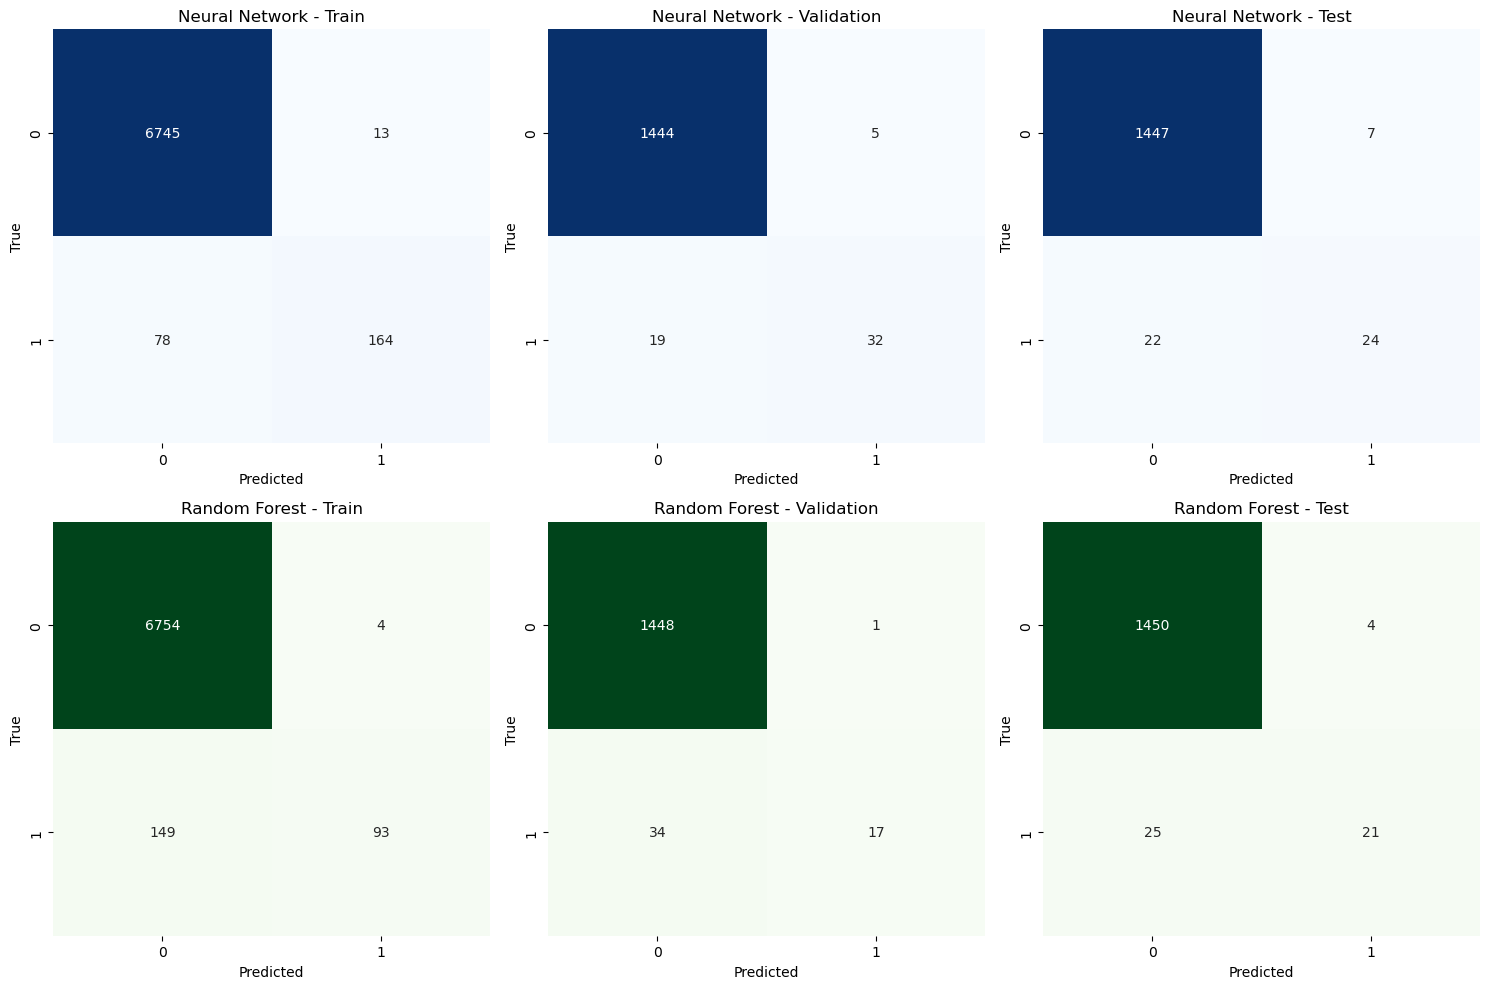

In [57]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot confusion matrices for Neural Network
sns.heatmap(conf_matrix_nn_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Neural Network - Train")
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

sns.heatmap(conf_matrix_nn_val, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Neural Network - Validation")
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

sns.heatmap(conf_matrix_nn_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 2])
axes[0, 2].set_title("Neural Network - Test")
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('True')

# Plot confusion matrices for Random Forest
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("Random Forest - Train")
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

sns.heatmap(conf_matrix_val_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Random Forest - Validation")
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')

sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1, 2])
axes[1, 2].set_title("Random Forest - Test")
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('True')

# Adjust layout
plt.tight_layout()
plt.show()

## Learning Curve 

Epoch 1/30


/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-04 15:31:24.269727: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5821 - loss: 0.6394
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9753 - loss: 0.2034
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9753 - loss: 0.1531
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9753 - loss: 0.1584
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9753 - loss: 0.1423
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9753 - loss: 0.1420
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9753 - loss: 0.1210
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9753 - loss: 0.1190
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9753 - loss: 0.1191
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9753 - loss: 0.1177
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9753 - loss: 0.1072
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7390 - loss: 0.5276 
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9696 - loss: 0.2076
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9696 - loss: 0.1741
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9696 - loss: 0.1557
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.9696 - loss: 0.1387
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9696 - loss: 0.1313
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9696 - loss: 0.1220
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.9696 - loss: 0.1137
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9696 - loss: 0.1149
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9696 - loss: 0.0990
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9707 - loss: 0.1025
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accurac

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7913 - loss: 0.4595 
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9691 - loss: 0.1749
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9691 - loss: 0.1524
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.9691 - loss: 0.1377
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9691 - loss: 0.1274
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9693 - loss: 0.1103
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9694 - loss: 0.1052
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9703 - loss: 0.1060
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9680 - loss: 0.0958
Epoch 10/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9716 - loss: 0.0934
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9727 - loss: 0.0858
Epoch 12/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accurac

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8243 - loss: 0.4153 
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9660 - loss: 0.1823
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9660 - loss: 0.1460
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9660 - loss: 0.1359
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9659 - loss: 0.1136
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9679 - loss: 0.1032
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9669 - loss: 0.1042
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9676 - loss: 0.1024
Epoch 9/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9691 - loss: 0.0937
Epoch 10/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9716 - loss: 0.0991
Epoch 11/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9675 - loss: 0.0917
Epoch 12/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accurac

2025-02-04 15:31:30.092992: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-02-04 15:31:30.093218: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8383 - loss: 0.3895 
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9645 - loss: 0.1633
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9656 - loss: 0.1438
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9651 - loss: 0.1208
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9675 - loss: 0.1116
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9659 - loss: 0.1032
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9665 - loss: 0.1034
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9698 - loss: 0.0948
Epoch 9/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9689 - loss: 0.0921
Epoch 10/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9692 - loss: 0.0875
Epoch 11/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9736 - loss: 0.0892
Epoch 12/30
110/110 ━━━━━━━━━━━━━━━━━━━━

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8523 - loss: 0.3641 
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9666 - loss: 0.1610
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9659 - loss: 0.1300
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9652 - loss: 0.1087
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9670 - loss: 0.1039
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9716 - loss: 0.0950
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9714 - loss: 0.0887
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9677 - loss: 0.0895
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9698 - loss: 0.0899
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9772 - loss: 0.0830
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9741 - loss: 0.0743
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8635 - loss: 0.3463
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9690 - loss: 0.1434
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9691 - loss: 0.1204
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9700 - loss: 0.1078
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9690 - loss: 0.1029
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9721 - loss: 0.0943
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9694 - loss: 0.0871
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9708 - loss: 0.0861
Epoch 9/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9749 - loss: 0.0815
Epoch 10/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9728 - loss: 0.0806
Epoch 11/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9703 - loss: 0.0817
Epoch 12/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 

2025-02-04 15:31:36.809545: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-02-04 15:31:36.809792: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8857 - loss: 0.3219
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.9639 - loss: 0.1434
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9642 - loss: 0.1235
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9632 - loss: 0.1117
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9669 - loss: 0.1080
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9655 - loss: 0.0972
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.9668 - loss: 0.0922
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9714 - loss: 0.0840
Epoch 9/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9693 - loss: 0.0838
Epoch 10/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9721 - loss: 0.0858
Epoch 11/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9718 - loss: 0.0808
Epoch 12/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 

/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leonardochavezrojas/Anaconda/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8897 - loss: 0.3197
Epoch 2/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9682 - loss: 0.1363
Epoch 3/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9662 - loss: 0.1113
Epoch 4/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9681 - loss: 0.1017
Epoch 5/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9706 - loss: 0.0950
Epoch 6/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9685 - loss: 0.0920
Epoch 7/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9725 - loss: 0.0861
Epoch 8/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9763 - loss: 0.0731
Epoch 9/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9760 - loss: 0.0779
Epoch 10/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9751 - loss: 0.0757
Epoch 11/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9744 - loss: 0.0747
Epoch 12/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 

2025-02-04 15:31:42.299641: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-02-04 15:31:42.299842: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9046 - loss: 0.3014
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9679 - loss: 0.1255
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9685 - loss: 0.1082
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9694 - loss: 0.0898
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9711 - loss: 0.0872
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9722 - loss: 0.0823
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9757 - loss: 0.0768
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9772 - loss: 0.0719
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9745 - loss: 0.0701
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9739 - loss: 0.0733
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9782 - loss: 0.0663
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 

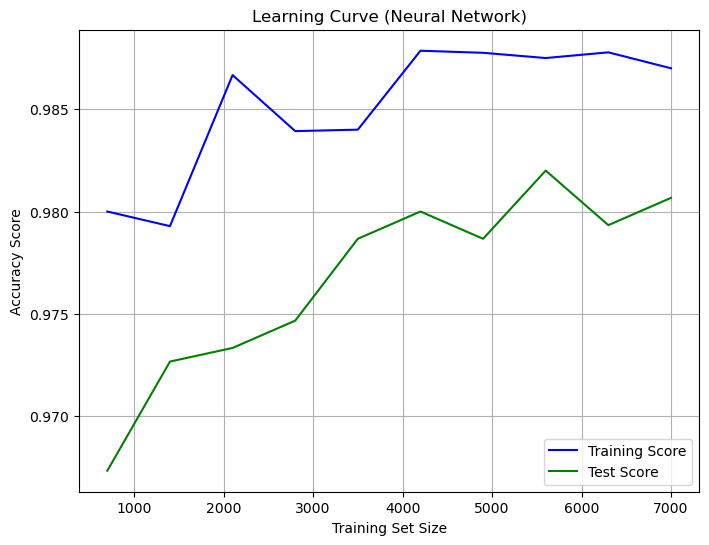

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define train sizes for incremental learning
train_sizes = np.linspace(0.1, 1.0, 10)  # Training set fractions
train_scores = []  # To store training accuracies
test_scores = []   # To store test accuracies

# Loop through different training set sizes
for train_size in train_sizes:
    # Calculate subset size
    train_subset_size = int(train_size * len(X_train4))
    
    # Create subsets of training data
    X_train_subset = X_train4[:train_subset_size]
    y_train_subset = y_train4[:train_subset_size]
    
    # Fit the pipeline to the training subset
    tuned_pipeline_with_nn.fit(X_train_subset, y_train_subset)
    
    # Evaluate on the training subset
    train_score = tuned_pipeline_with_nn.score(X_train_subset, y_train_subset)
    train_scores.append(train_score)
    
    # Evaluate on the full test set
    test_score = tuned_pipeline_with_nn.score(X_test4, y_test4)
    test_scores.append(test_score)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes * len(X_train4), train_scores, label='Training Score', color='blue')
plt.plot(train_sizes * len(X_train4), test_scores, label='Test Score', color='green')

# Add labels, title, and legend
plt.title('Learning Curve (Neural Network)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()
